# Imports

In [1]:
from utils.utils import grab_data
from utils.clustering import (create_vectors_advanced, get_candidate_cluster_n_values,
create_clusters_advanced, create_cluster_df, graph_pair_plot, graph_pair_plot_plotly)

# Grabbing Data

In [2]:
import pandas as pd

base_path = "FantasyData/advanced-stats"
file_path = f"{base_path}/QB/2023.csv"

df = pd.read_csv(file_path, index_col=0)
df.head(1)

,Index,season,season_type,completions,attempts,passing_yards,passing_tds,interceptions,sacks,sack_yards,...,wopr_x per game,special_teams_tds per game,fantasy_points per game,fantasy_points_ppr per game,tgt_sh per game,wopr_y per game,dom per game,w8dom per game,yptmpa per game,total_epa per game
0,2,2023,REG,166,278,2070.0,8,7.0,19.0,145.0,...,0.0,0.0,13.95,13.95,0.0,0.0,0.0,0.0,0.0,2.377215


In [3]:
position = "QB"
chosen_cluster_number = 6

font_size = 10
marker_size = 6
dim = 1000

# Testing Function

In [4]:
df.columns

Index(['Index', 'season', 'season_type', 'completions', 'attempts',
       'passing_yards', 'passing_tds', 'interceptions', 'sacks', 'sack_yards',
       ...
       'wopr_x per game', 'special_teams_tds per game',
       'fantasy_points per game', 'fantasy_points_ppr per game',
       'tgt_sh per game', 'wopr_y per game', 'dom per game', 'w8dom per game',
       'yptmpa per game', 'total_epa per game'],
      dtype='object', length=107)

In [5]:
suffix = "advanced-"

# subset_cols = ["dakota", "pacr", "passing_epa", "passing_air_yards"]
# subset_cols = ["dakota per game", "pacr per game", "passing_epa per game", "passing_air_yards per game"]

subset_cols = ["dakota", "passing_epa", "fantasy_points", "total_epa", "rushing_epa"]
# subset_cols = ["dakota per game", "passing_epa per game", "fantasy_points per game", "total_epa per game"]

subset_df = df[subset_cols]
subset_df.head(1)

,dakota,passing_epa,fantasy_points,total_epa,rushing_epa
0,0.368248,10.725585,111.6,19.017716,8.292132


# Cluster Work

## Generating X

In [6]:
X, X_scaled = create_vectors_advanced(subset_df)

## Finding Optimal N Value

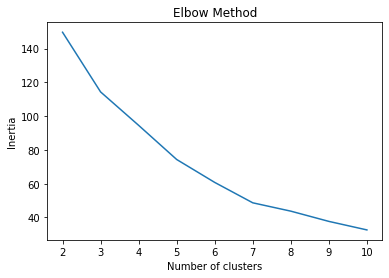

KMeans(algorithm='elkan', n_clusters=10, n_init=10)

In [7]:
get_candidate_cluster_n_values(X_scaled=X_scaled)

## Creating Clusters

In [8]:
labels, cluster_ranking = create_clusters_advanced(cluster_num=chosen_cluster_number, X_scaled=X_scaled, df=df)

## Creating Cluster DF

In [9]:
cluster_df = create_cluster_df(labels=labels, X=X, stats=subset_cols)

In [10]:
cluster_df.head(1)

,dakota,passing_epa,fantasy_points,total_epa,rushing_epa,Cluster
0,0.368248,10.725585,111.6,19.017716,8.292132,4


## Graphing Clusters

In [18]:
graph_pair_plot_plotly(df=cluster_df, cluster_rankings=cluster_ranking,
                       position=position, stats=subset_cols, 
                       save_suffix=suffix, font_size=font_size, marker_size=marker_size,
                       height=dim, width=dim
                      )

In [12]:
cluster_dict = dict()
for key in cluster_ranking.keys():
    cluster_num = cluster_ranking[key]
    name = key
    if cluster_num in cluster_dict:
        cluster_dict[cluster_num].append(name)
    else:
        cluster_dict[cluster_num] = [name]

In [13]:
cluster_dict[2]

['Daniel Jones',
 'Mac Jones',
 'Zach Wilson',
 'Kenny Pickett',
 'Desmond Ridder',
 'Bryce Young']

In [14]:
cluster_dict[4]

['Matthew Stafford',
 'Russell Wilson',
 'Taysom Hill',
 'Joshua Dobbs',
 'Jordan Love',
 'Justin Fields',
 'Sam Howell',
 'Tyson Bagent']